In [54]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [35]:
# 1️⃣ Install Kaggle API
!pip install kaggle


In [40]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"bhagyasuma","key":"4a9d25f070aee4293646bd30e865f33b"}'}

In [41]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [42]:
# 3. Install Kaggle CLI (if needed)
!pip install -q kaggle


In [43]:
# 1️⃣ Delete the existing kaggle.json file
!rm ~/.kaggle/kaggle.json

After running these cells, try downloading the dataset again using the following command:

In [55]:
!kaggle datasets list -s "butterfly image classification"

ref                                                        title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
phucthaiv02/butterfly-image-classification                 Butterfly Image Classification                        236814249  2025-06-26 08:07:31.130000          19741        166  1.0              
gpiosenka/butterfly-images40-species                       Butterfly & Moths Image Classification 100 species    418471259  2023-04-21 22:53:16.223000          12746        147  1.0              
gauravduttakiit/butterfly-image-classification             Butterfly Image Classification                        236814249  2023-03-05 16:43:59.757000            146          6  0.7647059        
mdraselsarker/butter

In [56]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
butterfly-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
butterfly-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
import zipfile
import os

zip_file_path = 'butterfly-image-classification.zip'
extract_dir = 'butterfly_dataset'

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset unzipped to {extract_dir}")

Dataset unzipped to butterfly_dataset


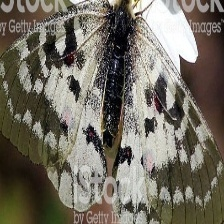

In [65]:
import random
import os
from IPython.display import Image, display

# Specify the path to your image folder
# Update this path to point to a specific directory containing images (e.g., 'butterfly_dataset/train' or 'butterfly_dataset/test')
folder_path = 'butterfly_dataset/train'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [64]:
import os

# List the contents of the train directory
print("Contents of butterfly_dataset/train:")
print(os.listdir('butterfly_dataset/train'))

# List the contents of the test directory
print("\nContents of butterfly_dataset/test:")
print(os.listdir('butterfly_dataset/test'))

Contents of butterfly_dataset/train:
['Image_2538.jpg', 'Image_789.jpg', 'Image_2836.jpg', 'Image_13.jpg', 'Image_2490.jpg', 'Image_3204.jpg', 'Image_1769.jpg', 'Image_1102.jpg', 'Image_3194.jpg', 'Image_2704.jpg', 'Image_4413.jpg', 'Image_4144.jpg', 'Image_2382.jpg', 'Image_5470.jpg', 'Image_1477.jpg', 'Image_3082.jpg', 'Image_2491.jpg', 'Image_480.jpg', 'Image_1459.jpg', 'Image_2790.jpg', 'Image_2487.jpg', 'Image_2590.jpg', 'Image_491.jpg', 'Image_2004.jpg', 'Image_2700.jpg', 'Image_2949.jpg', 'Image_403.jpg', 'Image_1093.jpg', 'Image_1604.jpg', 'Image_2751.jpg', 'Image_1156.jpg', 'Image_3553.jpg', 'Image_5262.jpg', 'Image_3855.jpg', 'Image_3847.jpg', 'Image_799.jpg', 'Image_6005.jpg', 'Image_4301.jpg', 'Image_5047.jpg', 'Image_3920.jpg', 'Image_4518.jpg', 'Image_2156.jpg', 'Image_1481.jpg', 'Image_4070.jpg', 'Image_4338.jpg', 'Image_4052.jpg', 'Image_3943.jpg', 'Image_3570.jpg', 'Image_1814.jpg', 'Image_951.jpg', 'Image_2293.jpg', 'Image_3327.jpg', 'Image_1767.jpg', 'Image_4748.jpg'

In [5]:
import pandas as pd

# Load the training and testing CSV files
train_df = pd.read_csv('/content/Training_set.csv')
test_df = pd.read_csv('/content/Testing_set.csv')

# Display the first few rows of each DataFrame to understand their structure
print("Training DataFrame Head:")
display(train_df.head())

print("\nTesting DataFrame Head:")
display(test_df.head())

Training DataFrame Head:


,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART



Testing DataFrame Head:


,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
